In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install pandas pandasai openai matplotlib scikit-learn

In [8]:
pip install numpy==1.24.4 --force-reinstall

  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.2.1 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
blosc2 

In [1]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/uber_data.csv')


In [11]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,3/1/16 0:00,3/1/16 0:07,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,3/1/16 0:00,3/1/16 0:11,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,3/1/16 0:00,3/1/16 0:31,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,3/1/16 0:00,3/1/16 0:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,3/1/16 0:00,3/1/16 0:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100000 non-null  int64  
 1   tpep_pickup_datetime   100000 non-null  object 
 2   tpep_dropoff_datetime  100000 non-null  object 
 3   passenger_count        100000 non-null  int64  
 4   trip_distance          100000 non-null  float64
 5   pickup_longitude       100000 non-null  float64
 6   pickup_latitude        100000 non-null  float64
 7   RatecodeID             100000 non-null  int64  
 8   store_and_fwd_flag     100000 non-null  object 
 9   dropoff_longitude      100000 non-null  float64
 10  dropoff_latitude       100000 non-null  float64
 11  payment_type           100000 non-null  int64  
 12  fare_amount            100000 non-null  float64
 13  extra                  100000 non-null  float64
 14  mta_tax                100000 non-nul

In [13]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [14]:
print(df.dtypes)


VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
pickup_longitude                float64
pickup_latitude                 float64
RatecodeID                        int64
store_and_fwd_flag               object
dropoff_longitude               float64
dropoff_latitude                float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object


In [15]:
OPEN_API_KEY = "Your open-ai key"

In [16]:
pip install pandasai

In [17]:
from pandasai.llm.openai import OpenAI
from pandasai.smart_dataframe import SmartDataframe

In [18]:
llm = OpenAI(api_token=OPEN_API_KEY)
pandas_ai = SmartDataframe(df, config={"llm": llm})

In [21]:
response = pandas_ai.chat("How many total trips recorded in the dataset? ")
print(response)

100000


In [32]:
response = pandas_ai.chat("Can you plot a histogram of trip distance keep mile range between 0 to 50?")
print(response)

/content/exports/charts/temp_chart.png


/content/exports/charts/temp_chart.png


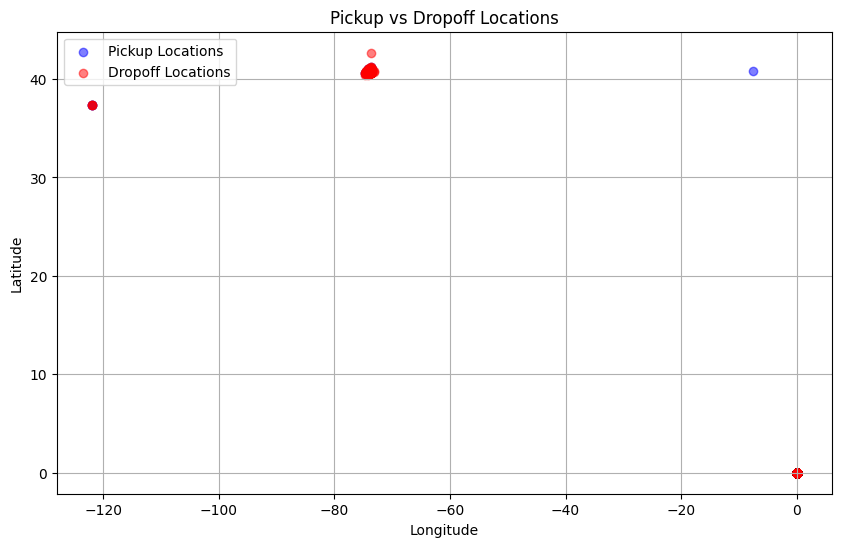

In [23]:
response = pandas_ai.chat("Can you create scatter plot of pickup vs. dropoff locations?")
print(response)